# CUSTOMER SEGMENTATION

A good personalised relationship with the customers is crucial for the success of a company. Customer segmentation helps a firm to segment its customers into different categories based on their needs, spending habits, financial condition and other relevant factors. This helps a firm to analyze the requirements of it customer base and along with their interests, lifestyles, priorities and learn their spending habits which can be used in planning its customer acquisition and retention plans. Customer Segmentation is a key step in the process of fine tuning marketing strategies and helps in increasing revenues of the firm as customers recieve marketing policies for only those products which they need.

In this notebook we will analyze and segment the customers of a store in order to help them better understand their consuers so that they strategize accordingly and increase their revenue

**IMPORTING THE NECESSARY LIBRARIES**

In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import datetime as dt

**READING THE DATASET**

In [89]:
df = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


**DATA PREPROCESSING**

> **HANDLING THE NULL VALUES**

In [90]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [91]:
df = df.dropna()    #Dropping rows with null values

> **FEATURE ENGINEERING**

In [92]:
df['Total_kids']= df['Kidhome'] + df['Teenhome']

df['Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'] #Combining all types of spendind in one feature

df['Age'] = 2015 - df.Year_Birth

In [93]:
df.Marital_Status = df.Marital_Status.replace({'Together': 'Married',
                                                'Divorced': 'Single',
                                                'Widow': 'Single', 
                                                'Alone': 'Single',
                                                'Absurd': 'Single',
                                                'YOLO': 'Single'}) #Converting the Marital_Status into a binary feature

> **REMOVING OUTLIERS**

In [94]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_kids,Spending,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,0.947202,607.075361,46.179603
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,0.749062,602.900476,11.985554
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,5.000000,19.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,69.000000,38.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,396.500000,45.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,1048.000000,56.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,3.000000,2525.000000,122.000000


In [95]:
df = df[df.Age < 100]
df = df[df.Income < 120000]

By using the output above, we can conclude that the Age and Income columns have outliers which have to be removed before working further

# EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'Marital Status Distribution')

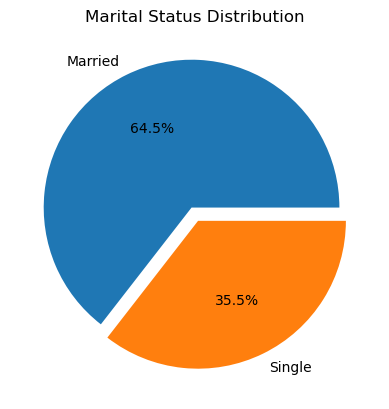

In [96]:
maritalstatus = df.Marital_Status.value_counts()
plt.pie(maritalstatus, 
             labels = maritalstatus.index,
             explode=(0.05,0.05),
             autopct='%1.1f%%')
plt.title('Marital Status Distribution')

Text(0.5, 1.0, 'Spending vs Income')

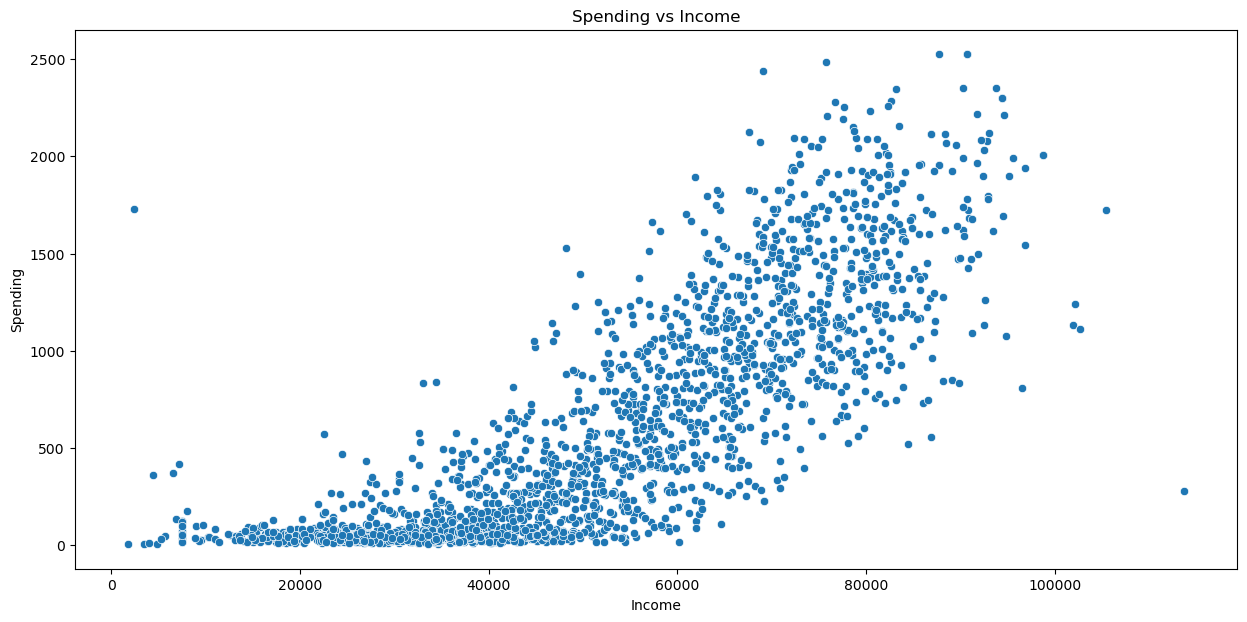

In [97]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, y='Spending', x='Income')
plt.title('Spending vs Income')

Text(0.5, 1.0, 'Campaign Analysis')

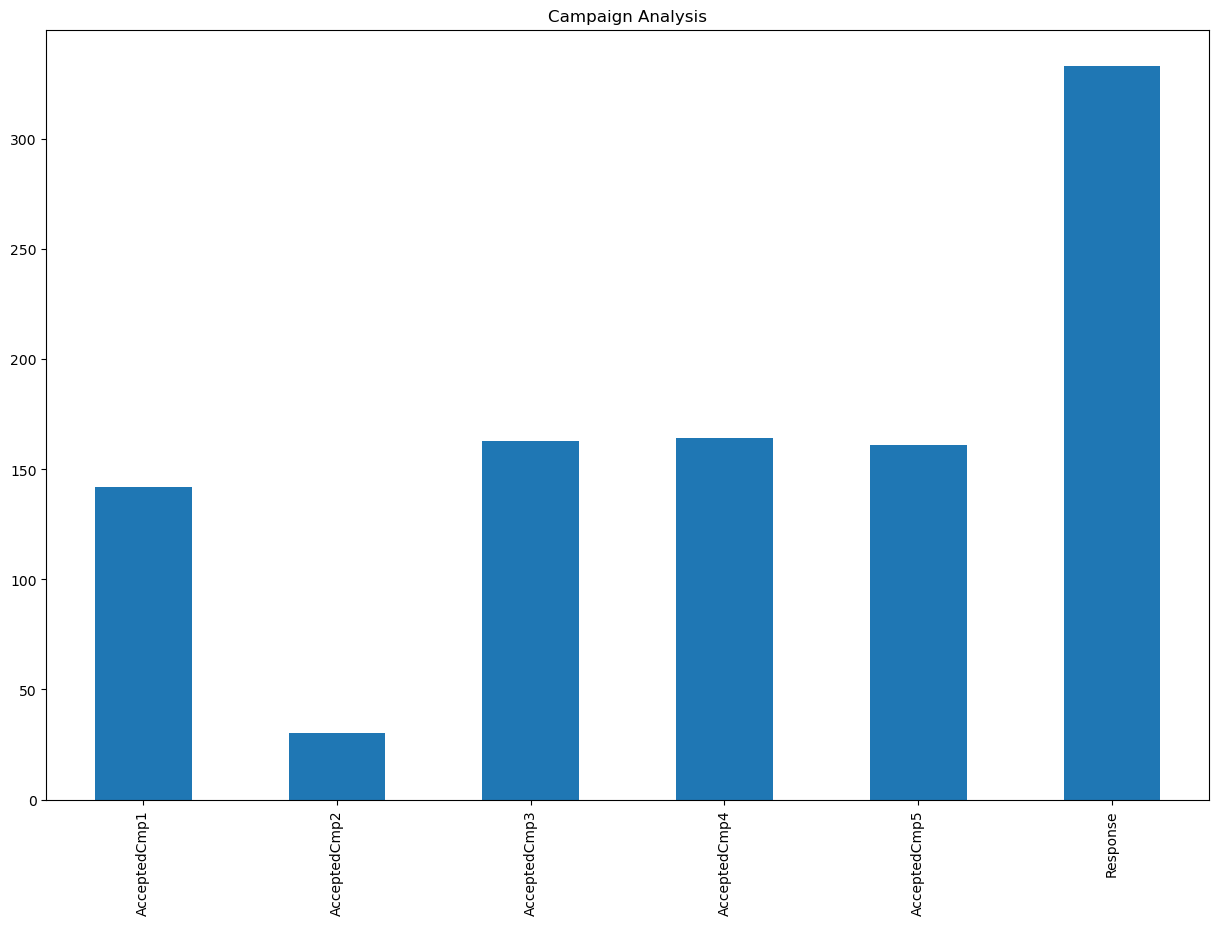

In [98]:
campaign = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()

campaign.plot(kind='bar', figsize=(15,10))
plt.title('Campaign Analysis')

While these graphs are useful in understanding diversity of the customers who have bought from the store, they do not give us an idea of the categories in which the customers can be divided and the interests or spending habits of these customers. We will have to perform customer segmentation to get this kind of additional information

> **EXTRACTING FEATURES**

In [99]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_kids', 'Spending', 'Age'],
      dtype='object')

As we can see the dataset has too many columns which are not required for the purpose of dividing the customers into different segments. Therefore we extract the relevant columns from this dataframe into a different dataframe and keep the other columns for later analysis

In [100]:
X = df.drop(['ID', 'Year_Birth','Kidhome','Education', 'Marital_Status',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], axis=1)    #Dropping the irrelevant columns

X.columns

Index(['Income', 'Total_kids', 'Spending', 'Age'], dtype='object')

> **FINDING THE NUMBER OF CLUSTERS USING ELBOW METHOD**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

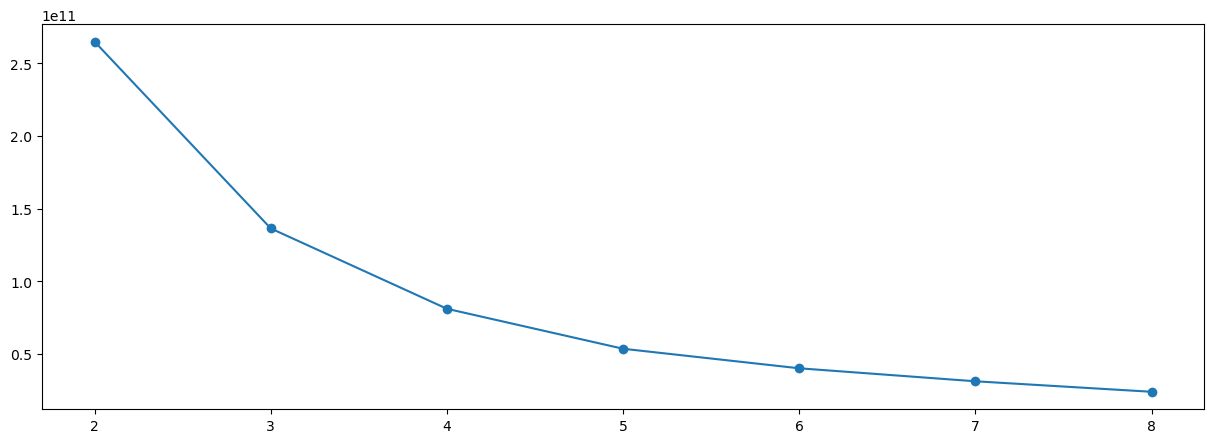

In [101]:
options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)


plt.figure(figsize=(15,5))
plt.plot(options, inertias, '-o')

From the above graph we can conclude that 4 is the ideal number of clusters into which the customers can be divided to get the most accurate information.

> **K-MEANS CLUSTERING**

In [102]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

segmented_customers = X.copy()
segmented_customers['clusters'] = preds
df['clusters'] = preds

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [103]:
segmented_customers.head()

,Income,Total_kids,Spending,Age,clusters
0,58138.0,0,1617,58,2
1,46344.0,2,27,61,3
2,71613.0,0,776,50,1
3,26646.0,1,53,31,0
4,58293.0,1,422,34,2


# UNDERSTANDING THE CLUSTERS

The KNN model has distributed the customers into 4 different clusters. However we will have to analyze this distribution in order to undertand the meaning of each cluster and which section of the customers it represents

<Axes: xlabel='clusters', ylabel='Income'>

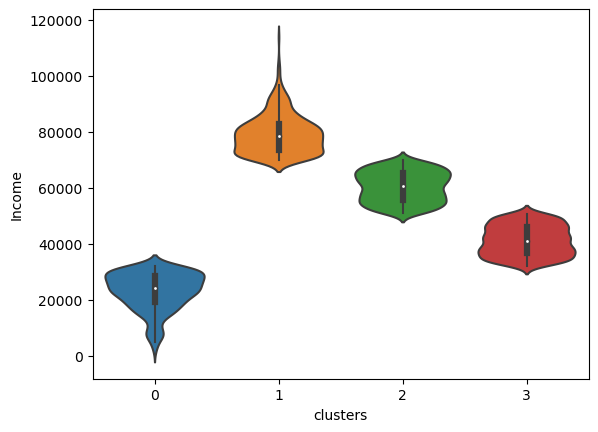

In [104]:
sns.violinplot(data=segmented_customers, y= 'Income', x= 'clusters')

<Axes: xlabel='clusters', ylabel='Total_kids'>

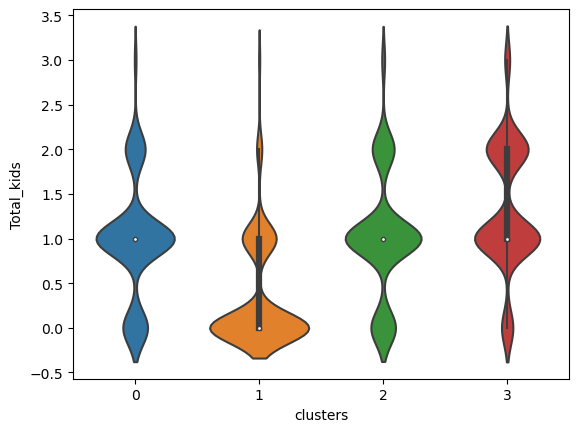

In [105]:
sns.violinplot(data=segmented_customers, y= 'Total_kids', x= 'clusters')

<Axes: xlabel='clusters', ylabel='Spending'>

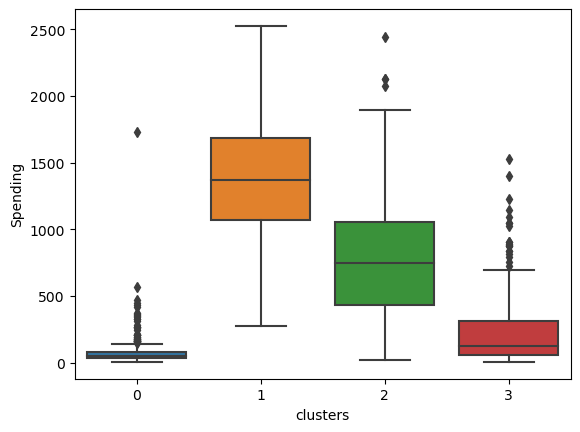

In [106]:
sns.boxplot(data=segmented_customers, y= 'Spending', x= 'clusters')

<Axes: xlabel='clusters', ylabel='Age'>

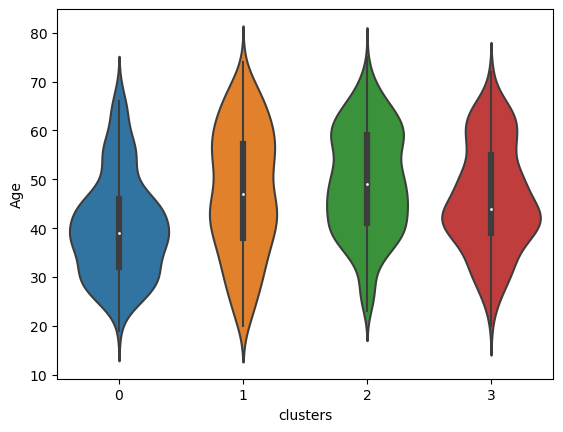

In [107]:
sns.violinplot(data=segmented_customers, y= 'Age', x= 'clusters')

Careful observation of the above plots leads us to the conclusion that the clusters can be named as follows :

0 ---> Lower Class

1 ---> Upper Class

2 ---> Upper Middle Class

3 ---> Lower Middle Class

> **ANALYZING THE CLUSTERS**

Now that we have segmented the customers into four different clusters we analyze the clusters and try to understand their behaviours and requirements,

In [108]:
segmented_customers.clusters = segmented_customers.clusters.replace({0 : 'Lower Class',
                                                           1 : 'Upper Class',
                                                           2 : 'Upper Middle Class',
                                                           3 : 'Lower Middle Class'})

df.clusters = df.clusters.replace({0 : 'Lower Class',
                                                           1 : 'Upper Class',
                                                           2 : 'Upper Middle Class',
                                                           3 : 'Lower Middle Class'})

In [109]:
segmented_customers.head()

,Income,Total_kids,Spending,Age,clusters
0,58138.0,0,1617,58,Upper Middle Class
1,46344.0,2,27,61,Lower Middle Class
2,71613.0,0,776,50,Upper Class
3,26646.0,1,53,31,Lower Class
4,58293.0,1,422,34,Upper Middle Class


Text(0.5, 1.0, 'Division of Clusters')

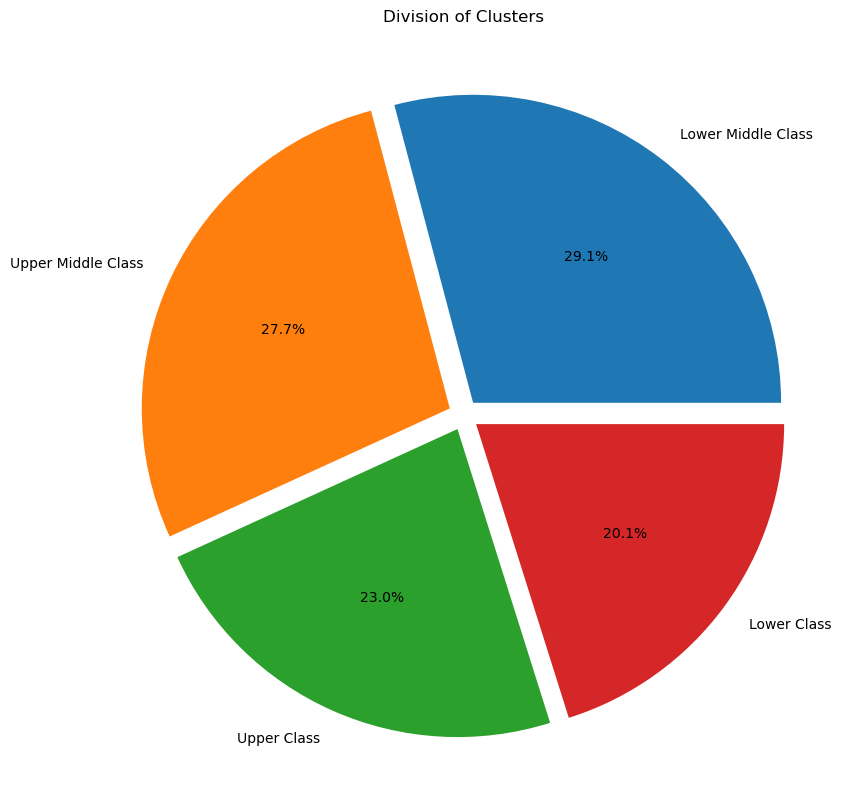

In [110]:
cluster_count= segmented_customers['clusters'].value_counts()

plt.figure(figsize=(20,10))
plt.pie(cluster_count, labels= cluster_count.index, explode=(0.05, 0.05, 0.05, 0.05), autopct='%1.1f%%')
plt.title('Division of Clusters')

Text(0, 0.5, 'Spending')

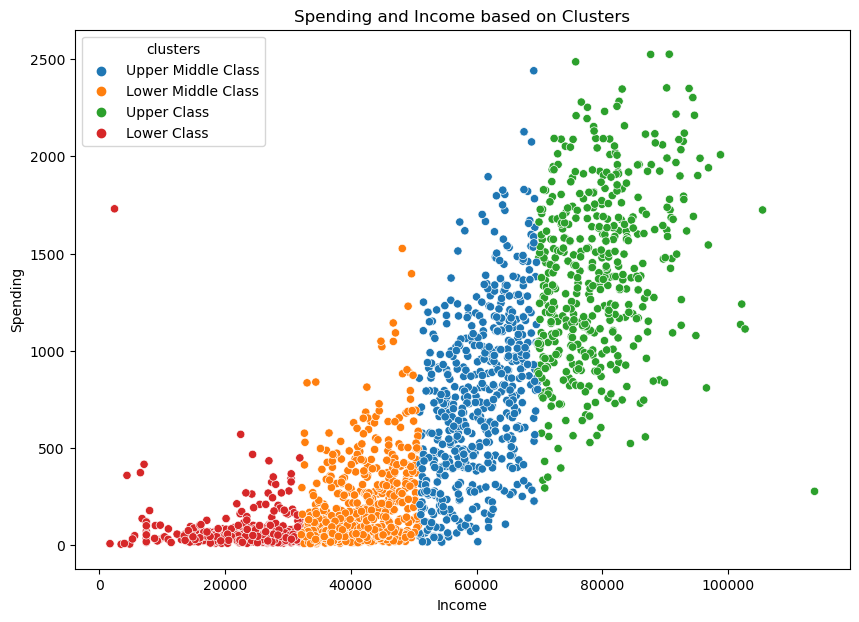

In [111]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=segmented_customers, y='Spending', x='Income', hue='clusters')
plt.title('Spending and Income based on Clusters')
plt.xlabel('Income')
plt.ylabel('Spending')

The amount of money spent by the customers from the upper class far outnumbers the amount of money spent by the lower classes. Lets analyze this spending based on the product on which the money is spent

Text(0.5, 1.0, 'Cluster wise Spendings')

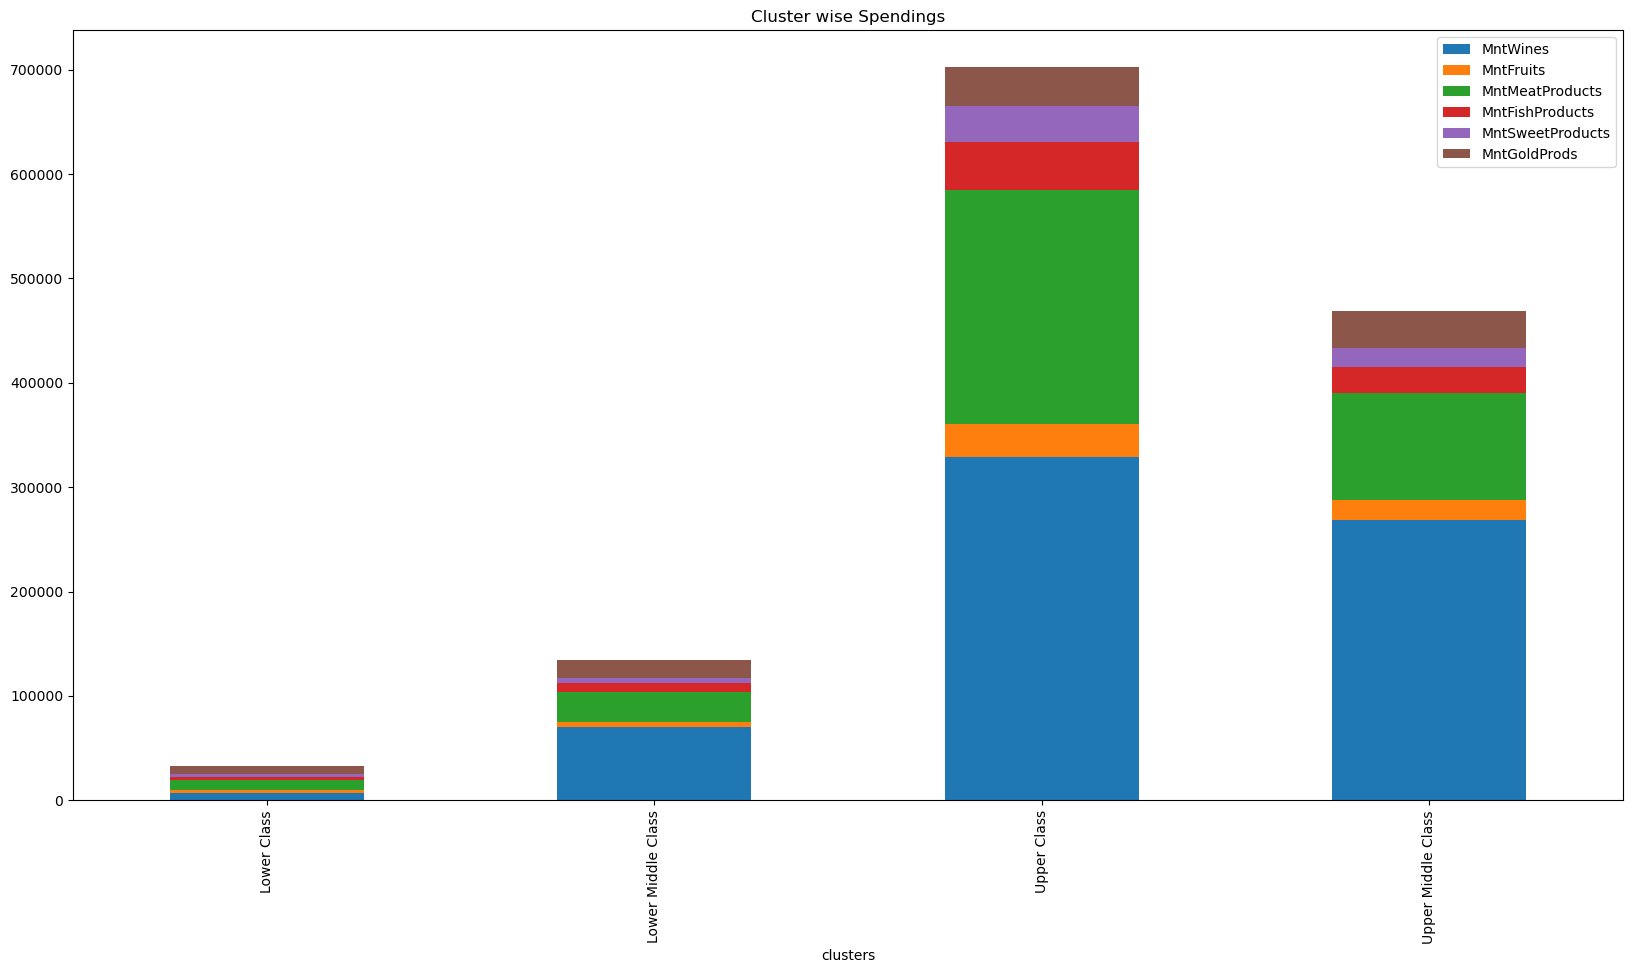

In [112]:
cluster_spendings = df.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

cluster_spendings.plot(kind='bar', stacked=True,figsize=(20,10))
plt.title('Cluster wise Spendings')

The main source of revenue for this store is the sale of wine and mear whereas other products such as fruit, fish, sweets and gold are unable to come up with a similar contribution

Text(0.5, 1.0, 'Cluster wise Purchasing habits')

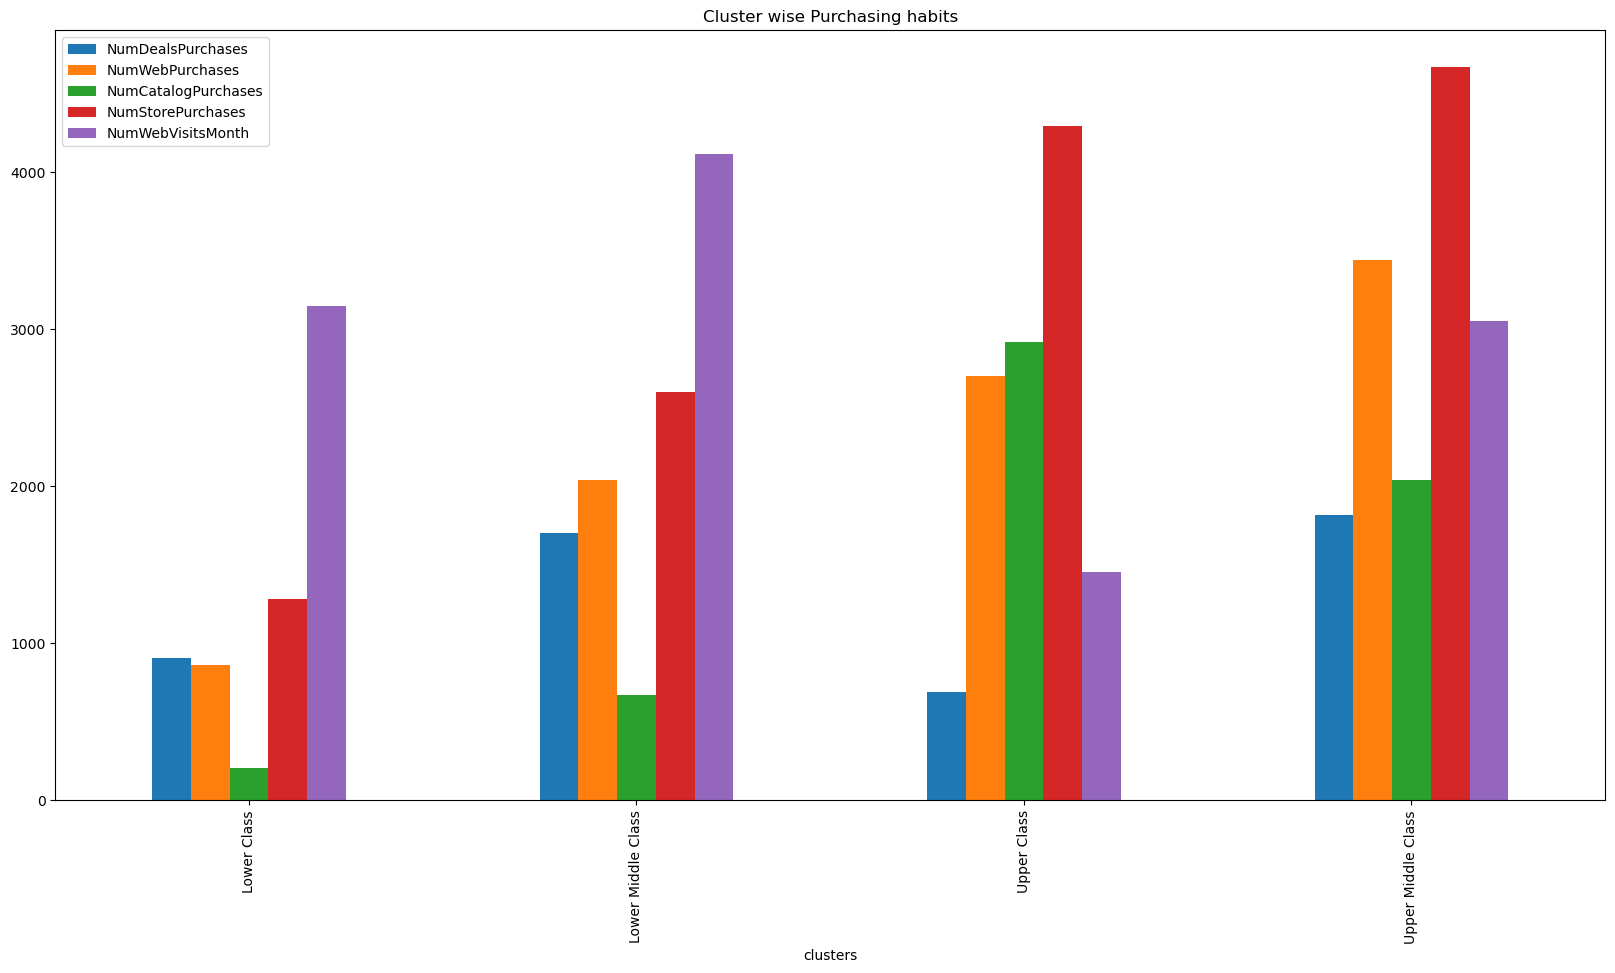

In [113]:
cluster_purchases = df.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

cluster_purchases.plot(kind='bar', figsize=(20,10))
plt.title('Cluster wise Purchasing habits')